Construcción de conjunto de datos con etiqueta de grupos compactos cerca o lejos de los voids

Voy hacer un compact_in_all, pero en la ultima columna de Target va ir voidC voidL, remplanzado void S y void R, el C es de cerca y la L de lejos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(0)
from collections import Counter
import numpy as np
from itertools import cycle, islice

import numpy as np
np.random.seed(0)

**funciones**

In [2]:
def diff(list1, list2):
    c = set(list1).union(set(list2))  # or c = set(list1) | set(list2)
    d = set(list1).intersection(set(list2))  # or d = set(list1) & set(list2)
    return list(c - d)

In [3]:
path = '../data/compact_in_voids_m3_full'
df = pd.read_table(path, sep="\s+", names=['i_gru', 'n_m', 'Ra', 'dec', 'z', 'thete_g ', 'mu',
                                           'sigv', 'r_b', 'flag', 'rabs1', 'd_ij', 'tcr', 'rp',
                                           'rabs2', 'tipo', 'estado'])
id_gc_voids = df.i_gru.to_list()
display(df.head(2))

path = '../data/compact_in_all'
df1 = pd.read_table(path, sep="\s+", names=['i_gru', 'n_m', 'Ra', 'dec', 'z', 'thete_g ', 'mu', 'sigv', 'r_b', 'flag',
'rabs1', 'd_ij', 'tcr', 'rp', 'rabs2', 'Target'])
id_gc_class = df1.i_gru.to_list()

,i_gru,n_m,Ra,dec,z,thete_g,mu,sigv,r_b,flag,rabs1,d_ij,tcr,rp,rabs2,tipo,estado
0,45,4,139.228,29.355,0.037095,6.212,26.001,204.675,14.300,0,-21.026,0.111687,0.049488,99.560814,-20.614,0.0,-1
1,73,4,151.012,31.098,0.022236,12.331,26.277,243.871,12.448,0,-21.662,0.166542,0.061933,118.873787,-19.414,1.0,0


In [4]:
display(df.shape)
display(df1.shape)

(29, 17)

(449, 16)

distribución de grupos cerca y en el boder del void 

<AxesSubplot:>

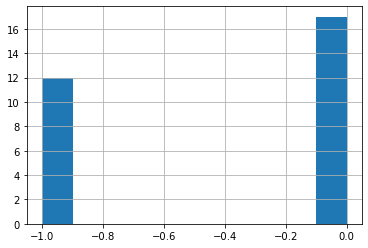

In [5]:
df.estado.hist()

In [6]:
Target =[]
for i in range(df.shape[0]):
    if df.estado.iloc[i] == -1:
        a = 'voidIN'
    else:
        a = 'voidED'
    Target.append(a)

In [7]:
df['Target'] = Target

In [8]:
df.head(2)

,i_gru,n_m,Ra,dec,z,thete_g,mu,sigv,r_b,flag,rabs1,d_ij,tcr,rp,rabs2,tipo,estado,Target
0,45,4,139.228,29.355,0.037095,6.212,26.001,204.675,14.300,0,-21.026,0.111687,0.049488,99.560814,-20.614,0.0,-1,voidIN
1,73,4,151.012,31.098,0.022236,12.331,26.277,243.871,12.448,0,-21.662,0.166542,0.061933,118.873787,-19.414,1.0,0,voidED


In [9]:
Tabla = df[['i_gru', 'Target']]

Encuentro los GCs que están en voids 

In [10]:
diferencia = diff(id_gc_voids, id_gc_class)
df1_void = df1.set_index('i_gru').drop(diferencia).copy()

In [11]:
display(df1_void.shape)
df1_void.head(2)

(29, 15)

,n_m,Ra,dec,z,thete_g,mu,sigv,r_b,flag,rabs1,d_ij,tcr,rp,rabs2,Target
i_gru,,,,,,,,,,,,,,,
45,4,139.228,29.355,0.037095,6.212,26.001,204.675,14.300,0,-21.026,0.111687,0.049488,99.560814,-20.614,VoiR
73,4,151.012,31.098,0.022236,12.331,26.277,243.871,12.448,0,-21.662,0.166542,0.061933,118.873787,-19.414,VoiS


In [12]:
Tabla.Target.values

array(['voidIN', 'voidED', 'voidED', 'voidIN', 'voidIN', 'voidED',
       'voidED', 'voidED', 'voidED', 'voidED', 'voidED', 'voidIN',
       'voidED', 'voidIN', 'voidED', 'voidED', 'voidED', 'voidED',
       'voidIN', 'voidED', 'voidIN', 'voidED', 'voidIN', 'voidIN',
       'voidED', 'voidIN', 'voidIN', 'voidIN', 'voidED'], dtype=object)

In [13]:
df1_void = df1_void.drop('Target', axis=1)
df1_void['Target'] = Tabla.Target.values

In [14]:
df1_void.head()

,n_m,Ra,dec,z,thete_g,mu,sigv,r_b,flag,rabs1,d_ij,tcr,rp,rabs2,Target
i_gru,,,,,,,,,,,,,,,
45,4,139.228,29.355,0.037095,6.212,26.001,204.675,14.300,0,-21.026,0.111687,0.049488,99.560814,-20.614,voidIN
73,4,151.012,31.098,0.022236,12.331,26.277,243.871,12.448,0,-21.662,0.166542,0.061933,118.873787,-19.414,voidED
85,4,154.841,49.084,0.056872,4.009,25.498,336.656,14.314,0,-21.889,0.102210,0.027534,98.047996,-20.836,voidED
100,7,157.811,25.954,0.021455,12.225,26.114,166.508,13.382,0,-20.770,0.167928,0.091463,113.725090,-20.470,voidIN
104,4,158.940,21.071,0.023768,2.757,24.035,217.066,13.667,0,-20.743,0.044270,0.018496,28.399565,-19.625,voidIN


In [15]:
df1_void.Target[45]

'voidIN'

In [16]:
index = df1_void.index.values
df1 = df1.set_index('i_gru')
for i in index:
    df1['Target'][i] = df1_void['Target'][i]
    print(df1['Target'][i])

voidIN
voidED
voidED
voidIN
voidIN
voidED
voidED
voidED
voidED
voidED
voidED
voidIN
voidED
voidIN
voidED
voidED
voidED
voidED
voidIN
voidED
voidIN
voidED
voidIN
voidIN
voidED
voidIN
voidIN
voidIN
voidED


/home/vane/anaconda3/envs/machine-learning/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [17]:
df1 = df1.reset_index()
display(df1.head(5))
display(df1.shape)

,i_gru,n_m,Ra,dec,z,thete_g,mu,sigv,r_b,flag,rabs1,d_ij,tcr,rp,rabs2,Target
0,2,4,116.577,22.020,0.046817,4.090,25.289,274.092,14.289,0,-21.512,0.092313,0.030544,82.543709,-20.895,Loose
1,4,5,117.794,50.217,0.021810,5.095,23.789,409.803,12.839,0,-21.235,0.055581,0.012300,48.176819,-21.207,Loose
2,6,4,119.190,45.886,0.054922,1.200,22.297,461.528,14.072,0,-22.218,0.034610,0.006801,28.362265,-22.014,Loose
3,9,4,120.355,27.240,0.048037,4.784,25.242,356.045,13.942,0,-21.989,0.144234,0.036739,99.029404,-21.446,Loose
4,10,6,120.491,9.561,0.016655,22.096,26.218,297.232,11.471,0,-22.052,0.134944,0.041174,159.737412,-20.325,Loose


(449, 16)

In [21]:
df1[df1['Target'] == 'voidIN'].shape

(12, 16)

In [22]:
df1[df1['Target'] == 'voidED'].shape

(17, 16)

In [20]:
#df1.to_csv('../data/compact_in_all_estado.csv', index=False)